# Курсова робота на тему "Метод спряженого градієнта Флетчера-Рівса"
# Виконав студент групи КМ-83 Сін Г.П.
<br><br>
## Постановка задачі
**Завдання 1.** *Дослідити збіжність метода Флетчера-Рівса при мінімізації функції Розенброка  в залежності від:*
1. Величини кроку h при обчисленні похідних.
2. Схеми обчислення похідних.
3. Виду методу одновимірного пошуку (ДСК-Пауелла або Золотого перетину).
4. Точності методу одновимірного пошуку.
5. Значення параметру в алгоритмі Свена.
6. Вигляду критерію закінчення:
$\begin{cases} \frac{\| x^{k+1}-x^k \|}{\| x^k \|} \leq \varepsilon \\ | f(x^{k+1}) - f(x^k) | \leq \varepsilon \end{cases} \ або \ \| S^k \| \leq \varepsilon $
7. Наявності рестартів.
8. Порівняти з модифікацією Полака-Ріб’єра.
<br><br>
**Завдання 2.** *Використати метод штрафних функцій (метод внутрішньої точки) для умовної оптимізації в залежності від:*
1. Розташування локального мінімума (всередині/поза допустимою областю).
2. Виду допустимої області (випукла/невипукла).


## Теоретичні відомості
**Завдання 1.** Використовуючи метод Флетчера-Рівса, потрібно мінімізувати функція Розенброка, яка має наступний вигляд:
$$ f(x) = (1 - x_1)^2 + 100 (x_2 - x_1^2)^2 $$
Її аналітичний мінімум знаходиться в точці $x_{min} = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$.<br>
Алгоритм самого методу Флетчера-Рівса можна описати такими формулами:
$$ \nabla f(x_{0}) = \begin{pmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \end{pmatrix} $$
$$ S_0 = - \nabla f(x_{0}) $$
$$ \text{Repeat:} $$
$$ \text{Compute} \ \lambda_k $$
$$ X_{k+1} = X_k + \lambda_k S_k $$
$$ \nabla f(x_{k+1}) = \begin{pmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \end{pmatrix} $$
$$\beta_k = \Big( \frac{\| \nabla f(x_{k+1}) \|}{\| \nabla f(x_k) \|} \Big)^2$$
$$ S_{k+1} = - \nabla f(x_{k+1}) + \beta_k S_k $$
$$ \text{END Repeat}$$
Похідні будемо обчислювати за наступними схемами:
1. Праві кінцеві різниці: $ f_п'(x) \approx \frac{f(x+h) - f(x)}{h} $
2. Ліві кінцеві різниці: $ f'_л(x) \approx \frac{f(x) - f(x - h)}{h} $
3. Центральні кінцеві різниці: $ f_ц'(x) \approx \frac{f_л'(x) + f_п'(x)}{2} $

Обчислення напрямку в стандартному методі Флетчера-Рівса проводиться так:
$$ S_{k+1} = - \nabla f(x_{k+1}) + \beta_k S_k $$
$$\beta_k = \Big( \frac{\| \nabla f(x_{k+1}) \|}{\| \nabla f(x_k) \|} \Big)^2 \ ,$$
З модифікацією Полака-Ріб’єра значення $\beta_k$ змінюється:
$$\beta_k = \frac{ \big[ \nabla f(x_{k+1}) - \nabla f(x_k) \big]^T \nabla f(x_{k+1}) }{\nabla f(x_k)^T \nabla f(x_k)} $$
Reference: https://neos-guide.org/content/nonlinear-conjugate-gradient-method<br><br>
У свою чергу, механізм рестартів працює наступним чином:
$$ \text{if} \ \lambda \leq \lambda_\varepsilon \implies \beta_k = 0, $$
де $\lambda$ – крок методу Флетчера-Рівса, $\lambda_\varepsilon$ – мінімальне допустиме значення кроку. Тобто фактично, прирівнявши значення $\beta_k$ до нуля, ми повертаємося до самої першої ітерації, де напрямок строго дорівнює анти-градієнту: $ S_{k+1} = - \nabla f(x_{k+1}) $.<br>
Reference: https://en.wikipedia.org/wiki/Conjugate_gradient_method#Restarts

**Завдання 2.** Потрібно вирішити задачу умовної оптимізації методом внутрішньої точки, що відноситься до класу методів шрафних функцій. Метод внутрішньої точки вводить штрафну функції з логарифмічним штрафом:
$$ P(x, R) = f(x) - R\sum{\ln{c_i(x)}}, $$
де $R$ – штрафний параметр, $c_i(x)$ – обмеження типу нерівності ($\geq$). Таким чином, задача умовної оптимізації зводиться до серії задач безумовної оптимізації, яка полягає в мінімізації функції $P(x, R)$ методом Флетчера-Рівса (у нашому випадку).

## Вирішення поставленої задачі

### Імпортування бібіліотек та створення допоміжних функцій

In [1]:
import sys
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy.matrices import Matrix
from sympy.printing import latex as L
from IPython.display import display, Markdown, Math

def printm(expression):
    '''Відображення jupyter-notebook-розмітки'''
    return display(Markdown(expression))

lmbd = sp.symbols('\lambda')  # символ лямбди, щоб створювати рівняння для знаходження кроку

def norm(X):
    '''Норма вектору'''
    return (X ** 2).sum()**0.5

### Алгоритм Свена
Реалізація алгоритму Свена, який повертає інтервал невизначенності для подальшого знаходження кроку методом золотого перетину або ДСК-Пауелла.

In [2]:
def sven(x0, S, f, alpha=0.1, dsk=False):
    '''
    x0 – початкова точка;
    S – початковий напрямок;
    f – функція;
    alpha – парметр альфа для втсановлення початкового значення кроку в даному алгоритмі;
    dsk – повертати додаткові дані, що потрібні для методу ДСК-Пауелла, чи ні.
    '''
    h_sven = alpha * abs(norm(x0) / norm(S))
    lmbd0 = 0
    x11, x12 = Matrix(x0) + lmbd*Matrix(S)
    fx0 = f(x11.subs(lmbd, lmbd0), x12.subs(lmbd, lmbd0))
    fx_positive_direction = f(x11.subs(lmbd, lmbd0 + h_sven), x12.subs(lmbd, lmbd0 + h_sven))
    fx_negative_direction = f(x11.subs(lmbd, lmbd0 - h_sven), x12.subs(lmbd, lmbd0 - h_sven))
    while fx0 < fx_positive_direction and fx0 < fx_negative_direction:
        h_sven = h_sven / 2
        fx_positive_direction = f(x11.subs(lmbd, lmbd0 + h_sven), x12.subs(lmbd, lmbd0 + h_sven))
        fx_negative_direction = f(x11.subs(lmbd, lmbd0 - h_sven), x12.subs(lmbd, lmbd0 - h_sven))

    direction = 1
    if fx_positive_direction > fx_negative_direction:
        direction = -1

    lmbdarray_sven = []
    fxarray_sven = []
    lmbd_sven = lmbd0
    fx_sven = f(x11.subs(lmbd, lmbd_sven), x12.subs(lmbd, lmbd_sven))
    k_sven = 0

    lmbdarray_sven.append(float(lmbd_sven))
    fxarray_sven.append(float(fx_sven))
    
    indx = 1
    while True:
        lmbd_sven = lmbd_sven + direction*h_sven*(2**k_sven)
        fx_sven = f(x11.subs(lmbd, lmbd_sven), x12.subs(lmbd, lmbd_sven))
        lmbdarray_sven.append(float(lmbd_sven))
        fxarray_sven.append(float(fx_sven))
        if fxarray_sven[-1] > fxarray_sven[-2]:
            # значення функції почало рости, тому припиняємо пошук
            break
        indx += 1
        k_sven += 1

    lmbdbackward_sven = (lmbdarray_sven[-1] + lmbdarray_sven[-2]) / 2
    fxbackward_sven = f(x11.subs(lmbd, lmbdbackward_sven), x12.subs(lmbd, lmbdbackward_sven))
    interval = [lmbdarray_sven[-3], lmbdbackward_sven]
    
    if dsk:
        interval.insert(1, lmbdarray_sven[-2])
        return interval, [fxbackward_sven, fxarray_sven[-2], fxarray_sven[-3]]
    return interval

### Метод золотого перетину
Реалізація методу золотого перетину, що повертає мінімальну точку функції (крок для методу Флетчера-Рівса).

In [3]:
def check_gold(L_gold, error):
    if abs(L_gold) <= error:
        return True
    else:
        return False

def golden_section(interval, x0, S, f, eps):
    '''
    interval – інтеревал невизначенності за Свеном;
    x0 – початкова точка;
    f – цільова функція;
    S – початковий напрямок;
    eps – похибка методу.
    '''
    a, b = interval
    L_gold = b - a
    x1_gold = a + 0.382*L_gold
    x2_gold = a + 0.618*L_gold
    x11, x12 = Matrix(x0) + lmbd*Matrix(S)
    fx1_gold = f(x11.subs(lmbd, x1_gold), x12.subs(lmbd, x1_gold))
    fx2_gold = f(x11.subs(lmbd, x2_gold), x12.subs(lmbd, x2_gold))
    while True:
        if fx1_gold <= fx2_gold:
            b = x2_gold
            L_gold = b - a
            x2_gold = x1_gold
            x1_gold = a + 0.382*L_gold
        else:
            a = x1_gold
            L_gold = b - a
            x1_gold = x2_gold
            x2_gold = a + 0.618*L_gold
        if check_gold(L_gold, eps):
            if fx1_gold < fx2_gold:
                answ = x1_gold
            else:
                answ = x2_gold
            break
        else:
            fx1_gold = f(x11.subs(lmbd, x1_gold), x12.subs(lmbd, x1_gold))
            fx2_gold = f(x11.subs(lmbd, x2_gold), x12.subs(lmbd, x2_gold))
    return answ

### Метод ДСК-Пауелла
Реалізація методу ДСК-Пауелла, що повертає мінімальну точку функції (крок для методу Флетчера-Рівса).

In [113]:
def dsk_paul(x0, S, f, x_dsk, fx_dsk, eps):
    '''
    x0 – початкова точка;
    S – початковий напрямок;
    f – цільова функція;
    x_dsk – три точки (інтервал невизначеності з точкою посередині), отримані за алгоритмом Свена;
    fx_dsk – f(x_dsk);
    eps – похибка методу.
    '''
    x1_dsk, x2_dsk, x3_dsk = x_dsk
    fx1_dsk, fx2_dsk, fx3_dsk = fx_dsk
    deltax_dsk = abs(x1_dsk - x2_dsk)
    
    x11, x12 = Matrix(x0) + lmbd*Matrix(S)
    kvx = x2_dsk + (deltax_dsk * (fx2_dsk - fx3_dsk)) / (2*(fx1_dsk - 2*fx2_dsk + fx3_dsk))
    fkvx = f(x11.subs(lmbd, kvx), x12.subs(lmbd, kvx))
    while True:
        if abs(fx2_dsk - fkvx) <= eps and abs(x2_dsk - kvx) <= eps:
            break
        else:
            if fkvx < fx2_dsk:
                if kvx > x2_dsk:
                    x1_dsk, x2_dsk = x2_dsk, kvx
                    fx1_dsk, fx2_dsk = fx2_dsk, fkvx
                else:
                    x2_dsk, x3_dsk = kvx, x2_dsk
                    fx2_dsk, fx3_dsk = fkvx, fx2_dsk
            else:
                if kvx > x2_dsk:
                    x3_dsk = kvx
                    fx3_dsk = fkvx
                else:
                    x1_dsk = kvx
                    fx1_dsk = fkvx
            a1 = (fx2_dsk - fx1_dsk) / (x2_dsk - x1_dsk)
            a2 = ((fx3_dsk-fx1_dsk)/(x3_dsk-x1_dsk) - (fx2_dsk-fx1_dsk)/(x2_dsk-x1_dsk)) / (x3_dsk - x2_dsk)
            kvx = (x1_dsk + x2_dsk) / 2 - (a1/(2*a2))
            fkvx = f(x11.subs(lmbd, kvx), x12.subs(lmbd, kvx))
    return kvx

### Обчислення похідних
- $ffr(f, x, i, h)$ – праві кінцеві різниці;
- $ffl(f, x, i, h)$ – ліві кінцеві різниці;
- $ffc(f, x, i, h)$ – центральні кінцеві різниці.

$fffr, fffl \  \text{та} \ fffc$ – аналогічно для других похідних.

In [5]:
def ffr(f, x, i, h):
    '''
    f – функція;
    x – список точок, в яких потрібно проводити диференціювання;
    i – номер змінної, по якій буде проходити диференціювання;
    h – крок диференціювання.
    '''
    x_h = x.copy()
    x_h[i] += h
    return ( f(*x_h) - f(*x) ) / h
def ffl(f, x, i, h):
    x_h = x.copy()
    x_h[i] -= h
    return ( f(*x) - f(*x_h) ) / h
def ffc(f, x, i, h):
    return ( ffr(f, x, i, h) + ffl(f, x, i, h) ) / 2

def fffr(f, x, i_list, h):
    '''
    f – функція;
    x – список точок, в яких потрібно проводити диференціювання;
    i_list – список з номерами змінних – порядок диференціювання;
    h – крок диференціювання.
    '''
    x_h = x.copy()
    x_h[i_list[1]] += h
    return ( ffr(f, x_h, i_list[0], h) - ffr(f, x, i_list[0], h) ) / h
def fffl(f, x, i_list, h):
    x_h = x.copy()
    x_h[i_list[1]] -= h
    return ( ffl(f, x, i_list[0], h) - ffl(f, x_h, i_list[0], h) ) / h
def fffc(f, x, i_list, h):
    return ( fffr(f, x, i_list, h) + fffl(f, x, i_list, h) ) / 2

### Метод Флетчера-Рівса
Головна функція, що реалізує метод Флетчера-Рівса та регулює всі необхідні парметри для дослідження.

In [41]:
def FR(func, x0, h_diff, epsilon, h_epsilon, eps_onedim,
       R=0, diff_method='central', h_search='gold', alpha=0.1,
       stop_crit='single', do_restarts=False, polak_mod=False):
    '''
    func - об'єкт функції, яку потрібно мінімізувати.
    x0 - початкова точка;
    h_diff - крок обчислення похідних;
    epsilon - похибка методу
    h_epsilon - мінімальне значення кроку: if (h <= h_epsilon) then restart
    eps_onedim - похибка методу одномірного пошуку
    R - штрафний параметр для методу внутрішньої точки
    diff_method – схема диференціювання;
    h_search – метод одномірного пошуку;
    alpha – параметр в алгоритмі Свена;
    stop_crit – вид критерію закінчення;
    do_restarts – використовувати рестарти чи ні;
    polak_mod – застосувати модифікацію Полака-Ріб’єра чи ні.
    '''
    
    f = func.calc
    
    if diff_method == 'right':
        ff = ffr
        fff = fffr
    elif diff_method == 'left':
        ff = ffl
        fff = fffl
    elif diff_method == 'central':
        ff = ffc
        fff = fffc
    else:
        print('No such differentiation method!')
        return
        
    func_cnt_list = []
    error_list = []
    restart_list = []
    dfx1 = ff(f, x0, 0, h_diff)
    dfx2 = ff(f, x0, 1, h_diff)
    grad = np.array([[dfx1], [dfx2]])
    S0 = - grad
    
    X = x0.copy()
    S = S0.copy()
    
    stop_crit_satisfied = False
    while not stop_crit_satisfied:
        if h_search == 'gold':
            interval = sven(X, S, f, alpha=alpha)
            h = golden_section(interval, X, S, f, eps_onedim)
        elif h_search == 'dsk':
            x_dsk, fx_dsk = sven(X, S, f, alpha=alpha, dsk=True)
            h = dsk_paul(X, S, f, x_dsk, fx_dsk, eps_onedim)
        elif h_search == 'theor':
            hessian = np.array([[fff(f, X, [0, 0], h_diff), fff(f, X, [0, 1], h_diff)],
                                [fff(f, X, [1, 0], h_diff), fff(f, X, [1, 1], h_diff)]])
            h = (grad.T.dot(grad) / S.T.dot(hessian).dot(S))[0, 0]
        else:
            print('No such method for lambda search!')
            return
        
        restarted = False
        if h <= h_epsilon and do_restarts:
            restarted = True
            beta = 0
            
        X_prev = X.copy()  # X^k
        X = X + h*S  # X^k+1
        
        dfx1 = ff(f, X, 0, h_diff)
        dfx2 = ff(f, X, 1, h_diff)
        
        grad_prev = grad.copy()
        grad = np.array([[dfx1], [dfx2]])
        grad_norm = norm(grad)
        grad_prev_norm = norm(grad_prev)
        
        if polak_mod:
            beta = (grad - grad_prev).T.dot(grad) / grad_prev.T.dot(grad_prev)
        else:
            beta = (grad_norm / grad_prev_norm)**2
        
        S_prev = S.copy()  # S^k
        S = - grad + S * beta  # S^k+1
        
        if stop_crit == 'single':
            #stop_crit_satisfied = norm(S_prev) <= epsilon
            stop_crit_satisfied = grad_norm <= epsilon
        elif stop_crit == 'sys':
            first_condition_satisfied = norm(X - X_prev) / norm(X_prev) <= epsilon
            second_condition_satisfied = abs( f(*X) - f(*X_prev) ) <= epsilon
            stop_crit_satisfied = first_condition_satisfied and second_condition_satisfied
        else:
            print('No such criterion!')
            return
        func_cnt_list.append(func.cnt)
        #error_list.append(norm(S_prev))
        error_list.append(grad_norm)
        if restarted:
            #restart_list.append([func.cnt, norm(S_prev)])
            restart_list.append([func.cnt, grad_norm])
    return {'x_opt': X, 'counts': func_cnt_list, 'errors': error_list, 'restarts': restart_list}

**test_FR** – допоміжна функція, що організує процес дослідження ефективності роботи методу Флетчера-Рівса в залежності від його параметрів.

In [68]:
def test_FR(pars):
    '''
    pars – словник параметрів методу Флетчера-Рівса.
    '''
    pars['func'].cnt = 0
    for par, val in pars.items():
        if type(val) == list:
            fig, axis = plt.subplots(nrows=len(val), sharex=True, sharey=True, figsize=(20, len(val)*6))
            for i, v in enumerate(val):
                model_pars = pars.copy()
                model_pars[par] = v
                result = FR(**model_pars)
                counts = result['counts']
                errors = result['errors']
                restarts = result['restarts']
                x_opt = result['x_opt']
                str_x = ', '.join(list(str(x_opt.flatten()).split(' ')))
                printm(f'{par}={v}:    ' + '$x_{opt} = ' + str_x + '$' + f' $i$={len(counts)}')
                if len(val) == 1:
                    ax = axis
                else:
                    ax = axis[i]
                    ax.set_title(v)
                ax.plot(counts, errors, 'b.-')
                ax.plot([counts[-1]]*2, [errors[-1], max(errors)/8], 'r-')
                ax.text(counts[-1], max(errors)/8 + max(errors)/16, str(counts[-1]), size='x-large')
                if restarts:
                    restarts_cords = np.array(restarts)
                    ax.plot(restarts_cords[:, 0], restarts_cords[:, 1], 'go')
                
                pars['func'].cnt = 0

### Визначення початкових умов
Задаємо початкову точку $x_0 = \begin{pmatrix} 6 \\ 6 \end{pmatrix}$ і цільову функцію (функція Розенброка) f. Було вирішено також створити клас для роботи функції – *Function*. Його задача буде полягати у власне обчисленні потрібної функції, підрахунку кількості обчислення функції, а також накладання штрафу при вирішенні задачі умовної оптимізації.

In [69]:
x0 = np.array([[6], [6]], dtype=np.float32)
f = lambda x1, x2: (1 - x1)**2 + 100*(x2 - x1**2)**2

class Function:
    def __init__(self, f, R=0, constraints=[]):
        self.f = f
        self.R = R
        self.constraints = constraints
        self.cnt = 0
    def calc(self, x1, x2):
        res = self.f(x1, x2)
        if self.constraints:
            for c in self.constraints:
                res -= self.R * np.log(float(abs(c(x1, x2))))
        if type(res) == np.ndarray:
            res = res.flatten()[0]
        self.cnt += 1
        return res

### Відображення та аналіз обчислень

1. Дослідимо збіжність методу в залежності від **величини кроку h при обчисленні похідних**.

h_diff=0.001:    $x_{opt} = [0.99467307, 0.98934187]$ $i$=65

h_diff=0.0001:    $x_{opt} = [1.00738641, 1.01486121]$ $i$=21

h_diff=5e-05:    $x_{opt} = [0.99675132, 0.99351897]$ $i$=102

h_diff=1e-05:    $x_{opt} = [0.99488035, 0.98978151]$ $i$=73

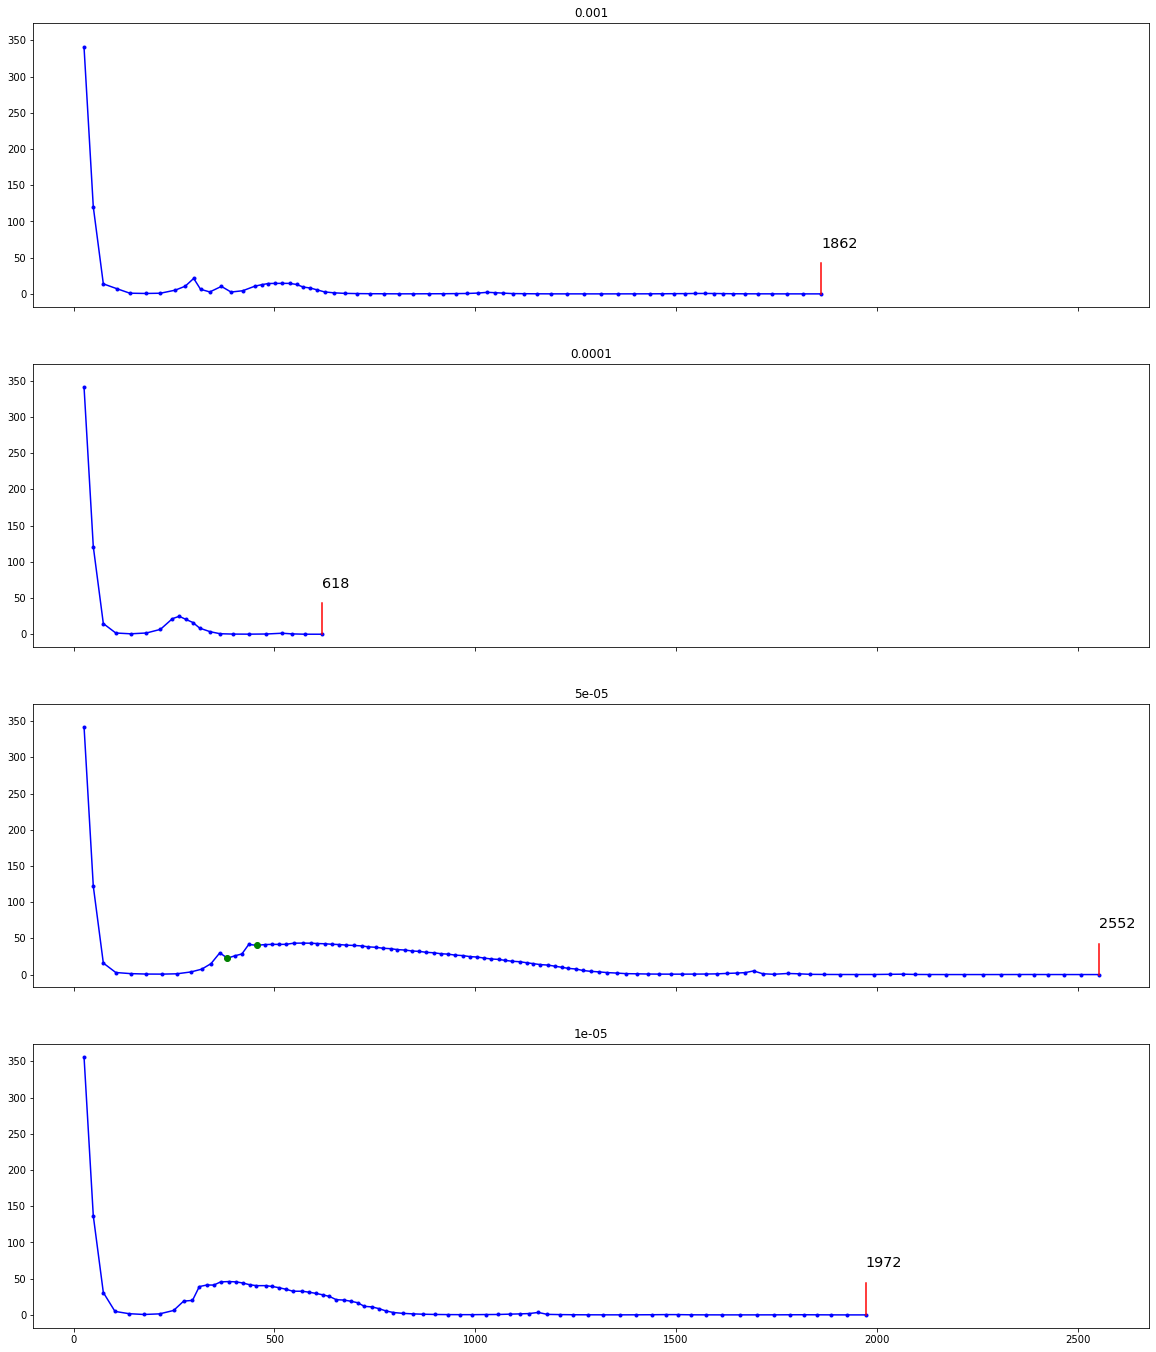

In [111]:
test_FR({
    'func': Function(f),
    'x0': x0,
    'h_diff': [1e-3, 1e-4, 5e-5, 1e-5],
    'epsilon': 0.01,
    'h_epsilon': 1e-6,
    'eps_onedim': 0.001,
    'do_restarts': True
})

<p style="text-align: center;"><b>Пояснення до виводу та графіків</b></p><br>
На початку виводиться інформація про результат роботи методу у форматі: назва_змінної=її_числове_значення: $x_{opt}=$отримана_точка $i=$кількість_ітерацій<br>
Далі виводяться графіки, які демонструють збіжність методу для відповідних значень змінної. Вісь X – кількість обчислень функції, вісь Y – значення критерію закінчення. Біля останньої точки графіку розміщується загальне значення кількості обчислень функції (значення по вісі X). Зеленими точками позначються ітерації, на яких відбувся рестарт.

У випадку з величиною кроку очевидно, що $h = 0.0001$ є найоптимальнішим значенням. При такому кроці, метод Флетчера-Рівса збігається за адекватну к-сть обчислень функції (618) та к-сть ітерацій (21) з достатньою точністю. Найгірше метод збігається при $h = 0.00005$: 2552 обчислень та 102 ітерації, а також наявність двох рестартів.

2. Дослідимо збіжність методу в залежності від **схеми обчислення похідних**.

diff_method=right:    $x_{opt} = [0.99445018, 0.98894348]$ $i$=70

diff_method=left:    $x_{opt} = [0.99603759, 0.9919702, ]$ $i$=63

diff_method=central:    $x_{opt} = [1.00736246, 1.01489997]$ $i$=20

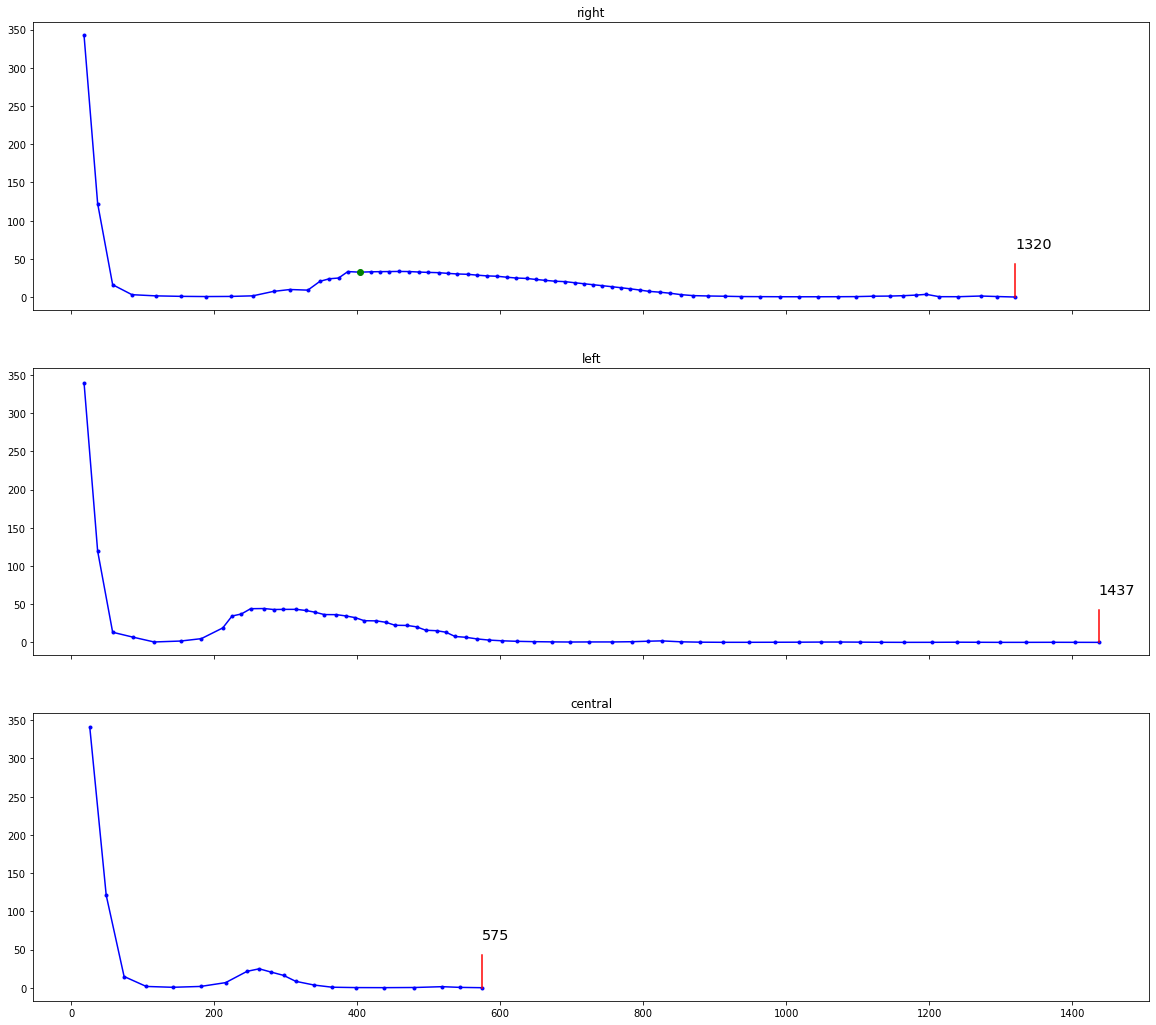

In [74]:
test_FR({
    'func': Function(f),
    'x0': x0,
    'h_diff': 0.0001,
    'epsilon': 0.05,
    'h_epsilon': 1e-6,
    'eps_onedim': 0.001,
    'diff_method': ['right', 'left', 'central'],
    'do_restarts': True
})

Найкраще метод збігається при обчисленні по центральній схемі, яка представляє собою середнє значення лівої та правої схем. При чому ліві та праві скінченні різниці показують приблизно такіж самі результати.

3. Дослідимо збіжність методу в залежності від **виду методу одновимірного пошуку** (ДСК-Пауелла або Золотого перетину).

h_search=gold:    $x_{opt} = [1.00736246, 1.01489997]$ $i$=20

h_search=dsk:    $x_{opt} = [1.03910417995042, 1.07996827777117]$ $i$=53

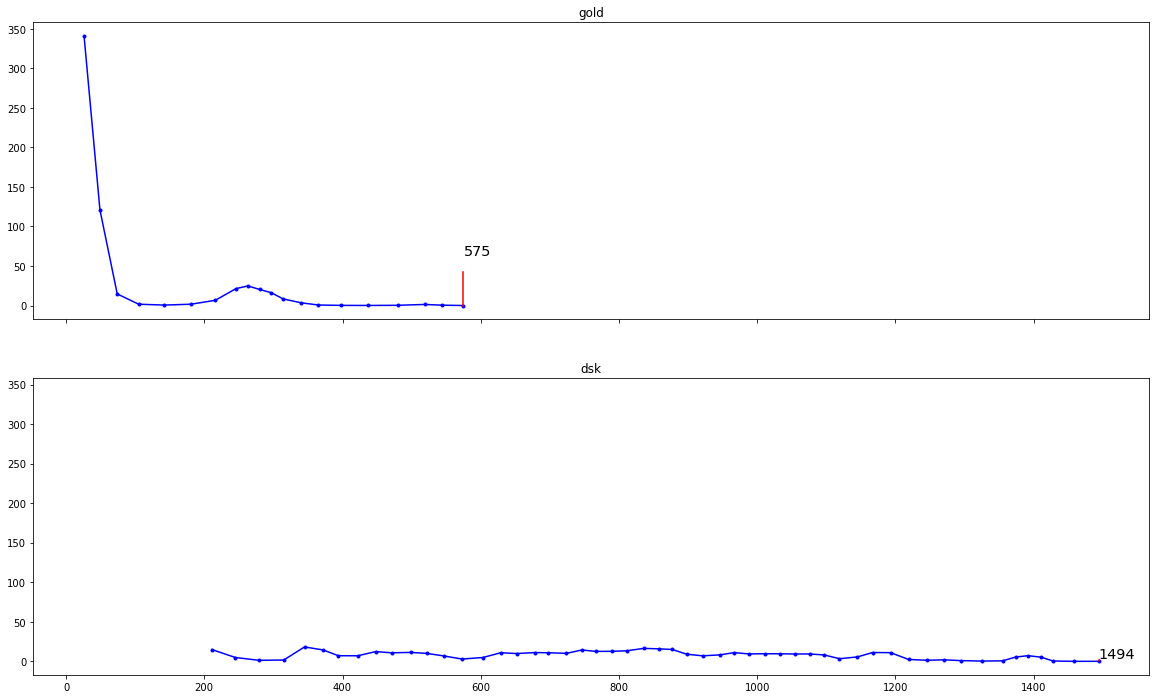

In [75]:
test_FR({
    'func': Function(f),
    'x0': x0,
    'h_diff': 0.0001,
    'epsilon': 0.05,
    'h_epsilon': 1e-6,
    'eps_onedim': 0.001,
    'diff_method': 'central',
    'h_search': ['gold', 'dsk'],
    'do_restarts': True
})

З використанням методу золотого перетину для пошуку кроку, метод Флетчера-Рівса значно швидше збігається, а також має більш кращу точність за метод ДСК-Пауелла. Варто також зауважити, що точність однимірного пошуку для обох методів = 0.001.

4. Дослідимо збіжність методу в залежності від **точності методу одновимірного пошуку**.<br>
**Золотий перетин:**

eps_onedim=0.01 $x_{opt} = [0.9914491, , 0.98287705]$

eps_onedim=0.001 $x_{opt} = [1.00736246, 1.01489997]$

eps_onedim=0.0001 $x_{opt} = [0.98289123, 0.96611166]$

eps_onedim=1e-05 $x_{opt} = [1.01810227, 1.03659871]$

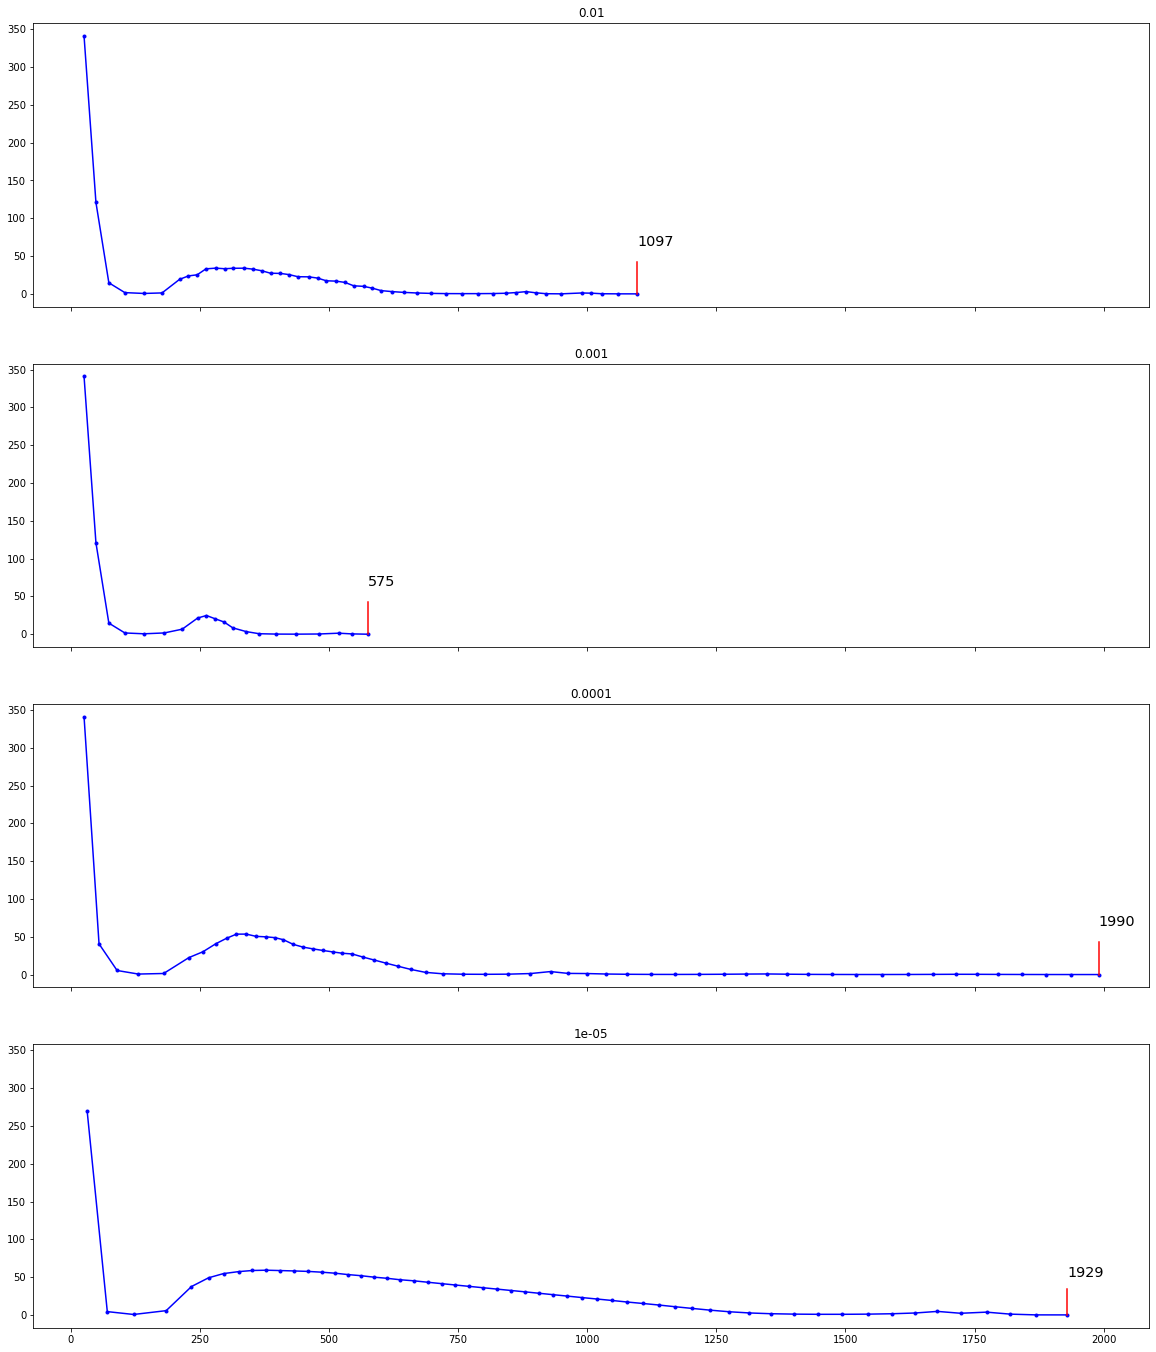

In [44]:
test_FR({
    'func': Function(f),
    'x0': x0,
    'h_diff': 0.0001,
    'epsilon': 0.05,
    'h_epsilon': 1e-6,
    'eps_onedim': [1e-2, 1e-3, 1e-4, 1e-5],
    'diff_method': 'central',
    'h_search': 'gold',
    'do_restarts': True
})

**ДСК:**

eps_onedim=0.01:    $x_{opt} = [0.972685955109265, 0.946092141119626]$ $i$=26

eps_onedim=0.001:    $x_{opt} = [1.03910417995042, 1.07996827777117]$ $i$=53

eps_onedim=0.0001:    $x_{opt} = [1.01802688148424, 1.03655224524401]$ $i$=40

eps_onedim=1e-05:    $x_{opt} = [0.996388818068284, 0.992746259935204]$ $i$=29

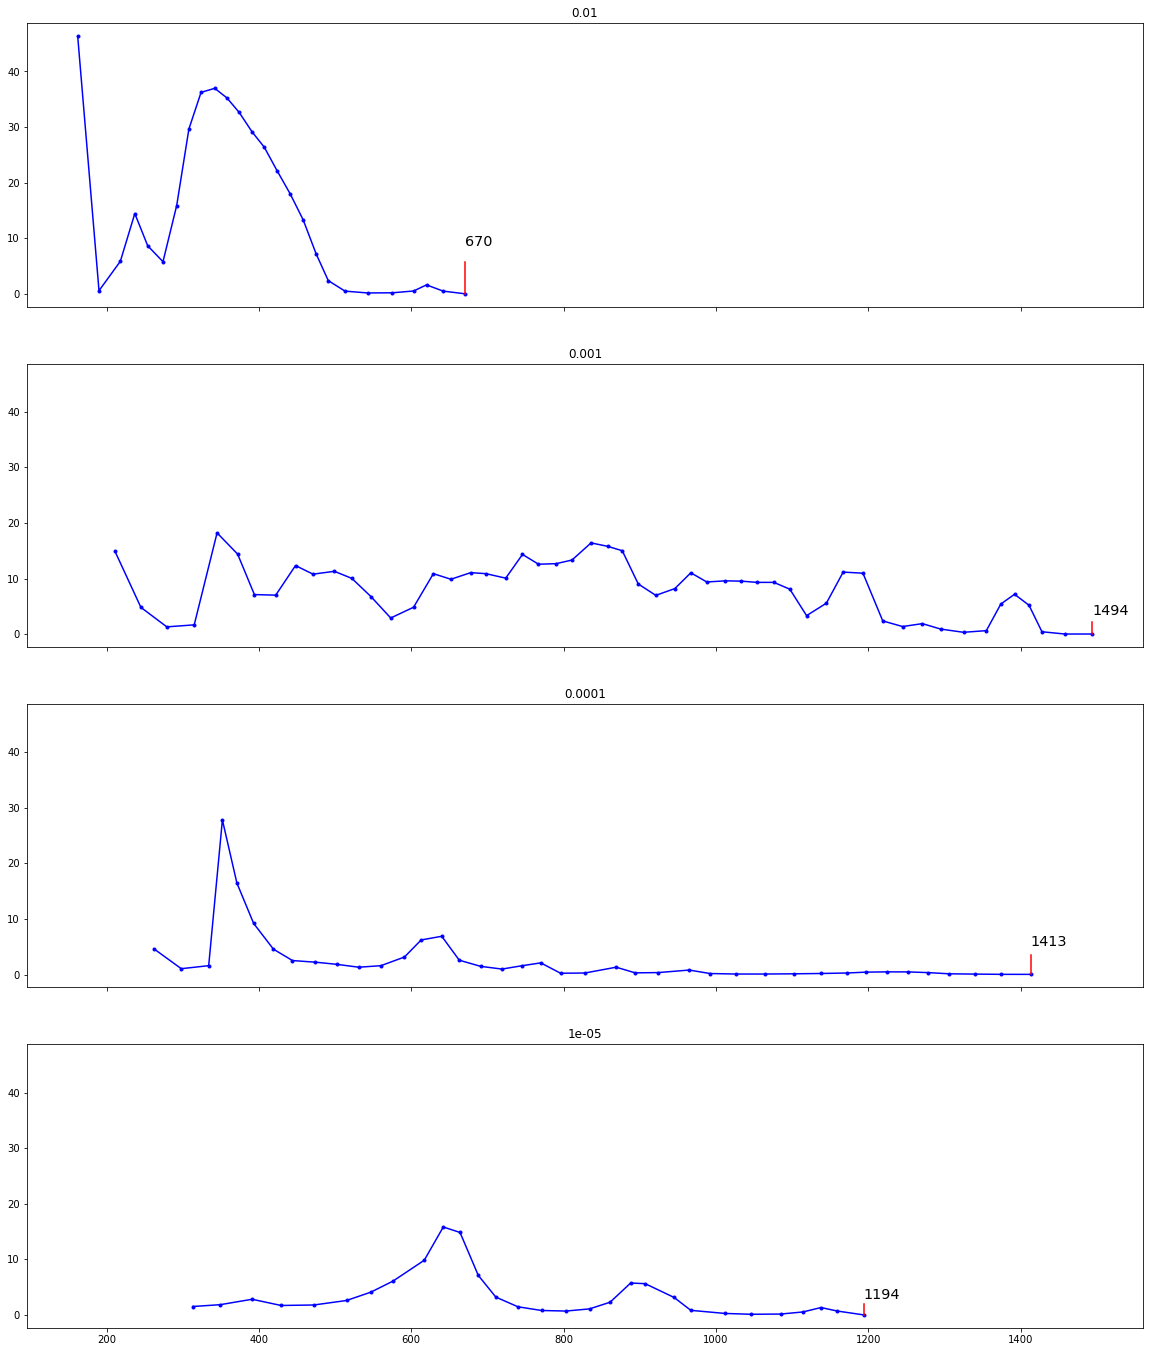

In [114]:
test_FR({
    'func': Function(f),
    'x0': x0,
    'h_diff': 0.0001,
    'epsilon': 0.05,
    'h_epsilon': 1e-6,
    'eps_onedim': [1e-2, 1e-3, 1e-4, 1e-5],
    'diff_method': 'central',
    'h_search': 'dsk',
    'do_restarts': True
})

Як висновок по останнім двом пунктам, що стосуються дослідження парметрів одномірного пошуку кроку, можна сказати наступне:
1. Для досягнення **одного** результату методам потрібна **різна** точність. Найкращою точністю для методу золотого перетину виявилося значення $0.001$, а для ДСК-Пауелла – $0.01$, при чому швидкість збігу та точність для методу Флетчера-Рівса у них схожа.
2. Для золотого перетину метод Флетчера-Рівса збігається більш плавно, аніж для ДСК-Пауелла.
3. Методу ДСК-Пауелла потрібна велика кількість обчислення функції на першій ітерації. Це видно з графіків вище: перша тока по вісі X сильно зміщена вправо. Проте для найоптимальнішого параметру точності такої поведінки не спостерігається.

5. Дослідимо збіжність методу в залежності від **значення параметру в алгоритмі Свена**.

alpha=0.1:    $x_{opt} = [1.00736246, 1.01489997]$ $i$=20

alpha=0.01:    $x_{opt} = [0.99206303, 0.98414424]$ $i$=66

alpha=0.001:    $x_{opt} = [1.04088699, 1.08358301]$ $i$=261

alpha=0.0001:    $x_{opt} = [0.95256096, 0.9071622, ]$ $i$=21

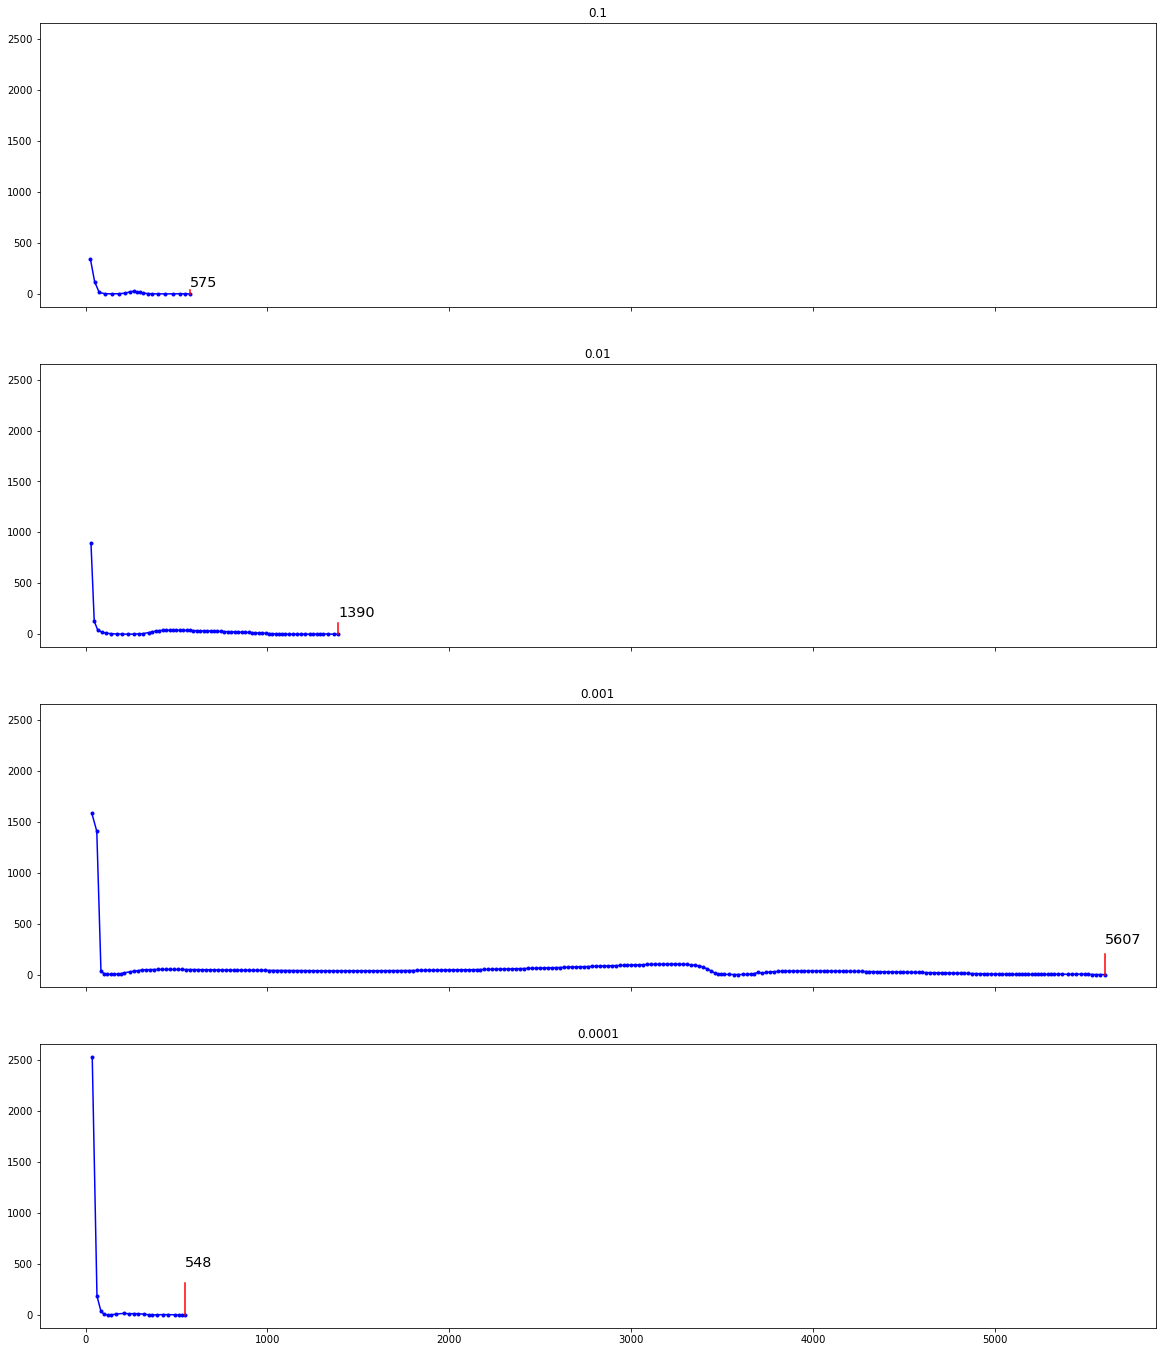

In [88]:
test_FR({
    'func': Function(f),
    'x0': x0,
    'h_diff': 0.0001,
    'epsilon': 0.05,
    'h_epsilon': 1e-6,
    'eps_onedim': 0.001,
    'diff_method': 'central',
    'alpha': [1e-1, 1e-2, 1e-3, 1e-4],
    'h_search': 'gold',
    'do_restarts': True
})

Метод показав приблизно однакову швидкість збігу при $\alpha=0.1$ (20 ітерацій, 575 обчислень) та $\alpha=0.0001$ (21 ітерація, 548 обчислень), але точність вийла набагато краще при $\alpha=0.1$.

6. Дослідимо збіжність методу в залежності від **вигляду критерію закінчення**.<br>
Критерій "single"
$$\| S^k \| \leq \varepsilon$$
Критерій "sys":
$$ \begin{cases} \frac{\| x^{k+1}-x^k \|}{\| x^k \|} \leq \varepsilon \\ | f(x^{k+1}) - f(x^k) | \leq \varepsilon \end{cases} $$

stop_crit=single:    $x_{opt} = [1.00736246, 1.01489997]$ $i$=20

stop_crit=sys:    $x_{opt} = [2.50891563, 6.29599718]$ $i$=4

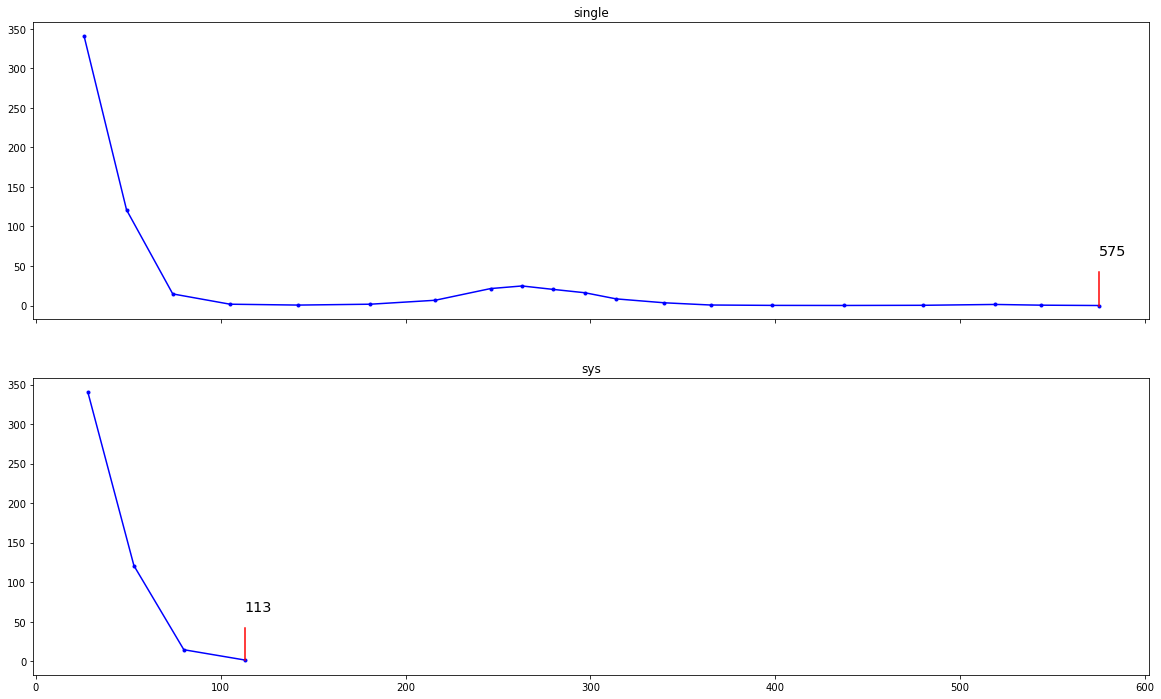

In [89]:
test_FR({
    'func': Function(f),
    'x0': x0,
    'h_diff': 0.0001,
    'epsilon': 0.05,
    'h_epsilon': 1e-8,
    'eps_onedim': 0.001,
    'diff_method': 'central',
    'alpha': 0.1,
    'h_search': 'gold',
    'stop_crit': ['single', 'sys'],
    'do_restarts': True
})

Як бачимо, другий критерій сходиться швидко, але метод сходиться з дуже низькою точністю (знайдена точка далеко від теоретичного мінімуму).<br>
Спробуємо зменшити похибку методу Флетчера-Рівса (epsilon) з 0.05 до 0.00001:

stop_crit=single:    $x_{opt} = [1.00000626, 1.00001256]$ $i$=31

stop_crit=sys:    $x_{opt} = [0.99874079, 0.99748017]$ $i$=27

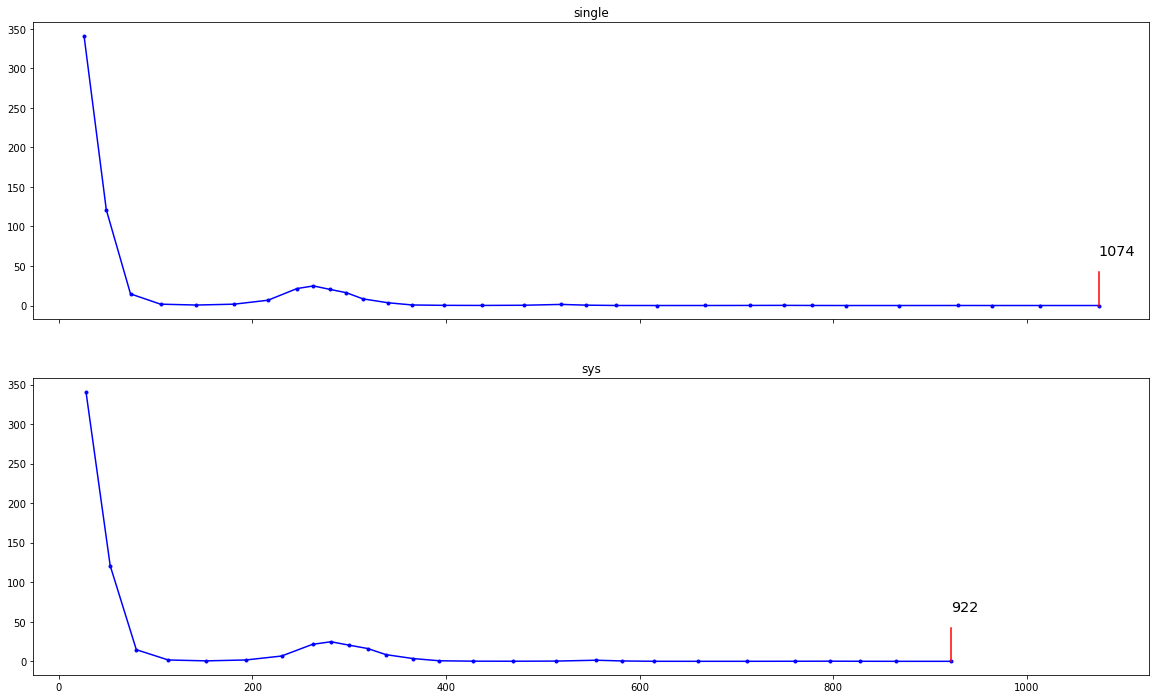

In [92]:
test_FR({
    'func': Function(f),
    'x0': x0,
    'h_diff': 0.0001,
    'epsilon': 0.00001,
    'h_epsilon': 1e-8,
    'eps_onedim': 0.001,
    'diff_method': 'central',
    'alpha': 0.1,
    'h_search': 'gold',
    'stop_crit': ['single', 'sys'],
    'do_restarts': True
})

Як і очікувалося, для другого критерію необхідно було зменшити похибку, щоб отримати задовільну точність. Проте, при такій похибці, перший критерій все одно дозволяє досягти набагато більшої точності з відносно невеликою різницею в швидкості збіжності методу.

7. Дослідимо збіжність методу в залежності від **наявності рестартів**:

do_restarts=True:    $x_{opt} = [1.00000626, 1.00001256]$ $i$=31

do_restarts=False:    $x_{opt} = [1.00000626, 1.00001256]$ $i$=31

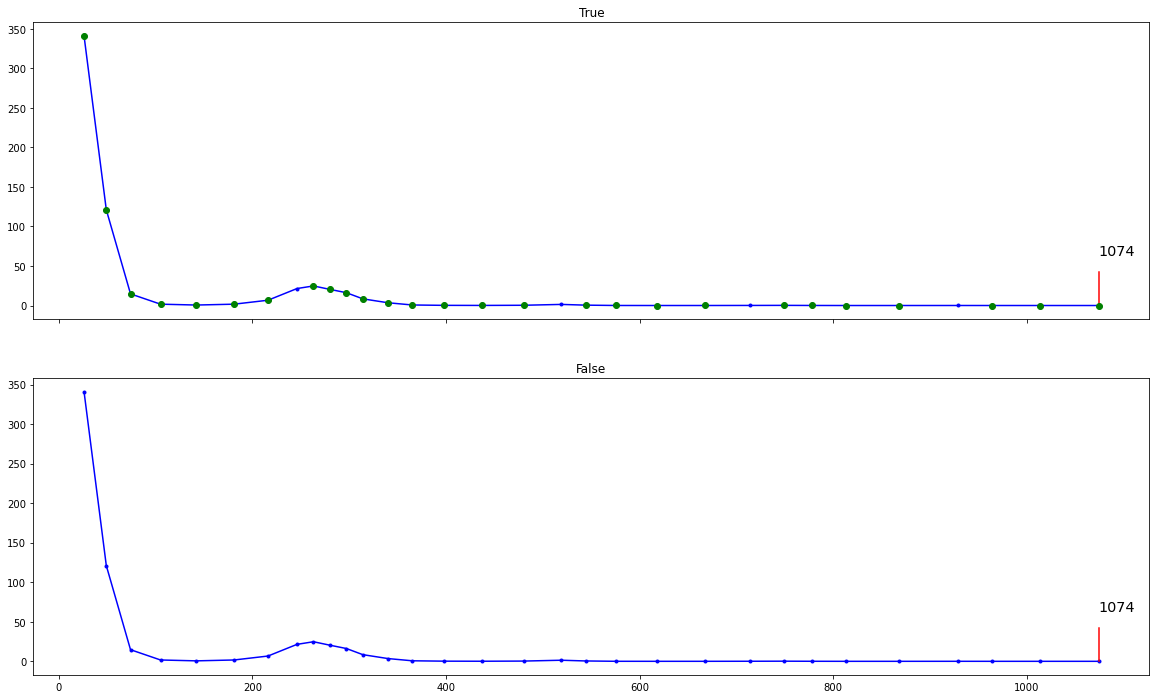

In [108]:
test_FR({
    'func': Function(f),
    'x0': x0,
    'h_diff': 0.0001,
    'epsilon': 0.00001,
    'h_epsilon': 1e-2,
    'eps_onedim': 0.001,
    'diff_method': 'central',
    'alpha': 0.1,
    'h_search': 'gold',
    'stop_crit': 'single',
    'do_restarts': [True, False]
})

Як бачимо, використання рестартів при $h_\varepsilon = 0.01$ не призвело до будь-яких змін. Пов'язано це з не високою складністю функції, а також тим, що з підібраними параметрами, метод достатньо швидко та ефективного збігається.

8. Порівняти з **модифікацією Полака-Ріб’єра**.

polak_mod=True:    $x_{opt} = [1.00522765, 1.01041142]$ $i$=30

polak_mod=False:    $x_{opt} = [1.00736246, 1.01489997]$ $i$=20

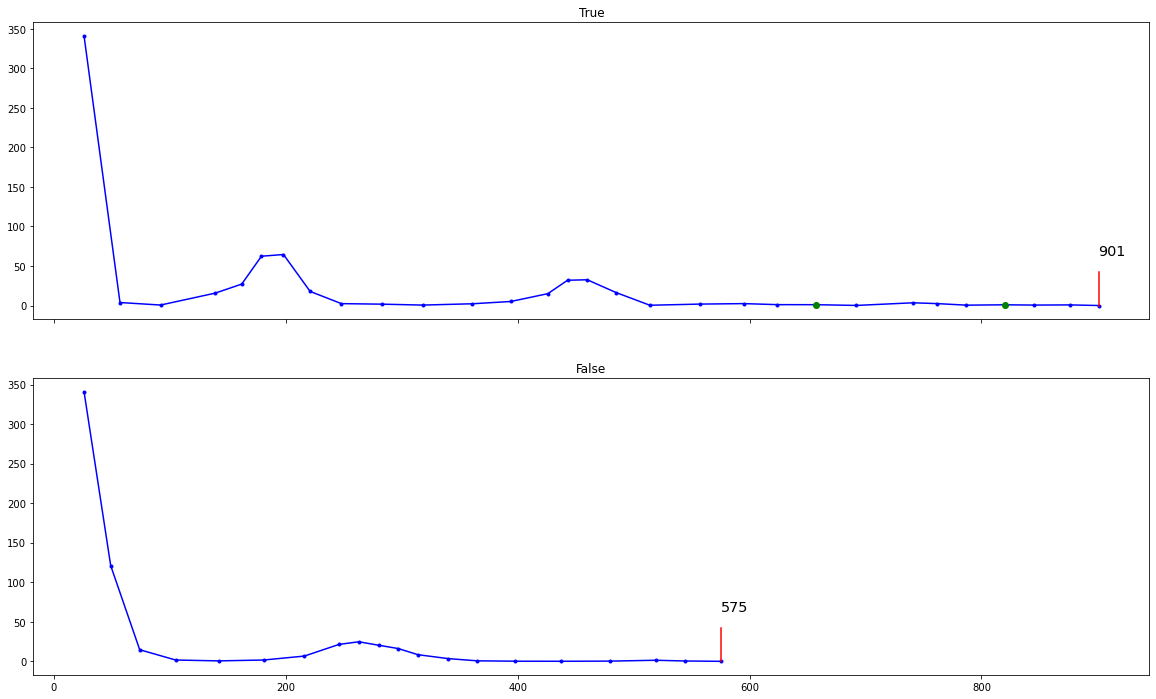

In [109]:
test_FR({
    'func': Function(f),
    'x0': x0,
    'h_diff': 0.0001,
    'epsilon': 0.05,
    'h_epsilon': 1e-6,
    'eps_onedim': 0.001,
    'diff_method': 'central',
    'alpha': 0.1,
    'h_search': 'gold',
    'stop_crit': 'single',
    'do_restarts': True,
    'polak_mod': [True, False]
})

З модифікацією Полака-Ріб’єра метод сходиться лише с трохи кращою точністю, але зі значно меншою швидкістю.

**Завдання 2**. Використати метод штрафних функцій (метод внутрішньої точки) для умовної оптимізації в залежності від:
1. Розташування локального мінімума (всередині/поза допустимою областю).
2. Виду допустимої області (випукла/невипукла).

2.1 Випукла область з мінімумо всередині. Візьмемо дану область:
$$(x_1 - 2)^2 + x_2^2 \leq 4$$
Тоді потрібне нам обмеження буде мати наступний вигляд:
$$ - (x_1 - 2)^2 - x2^2 + 4 \geq 0 $$
<img src="area1.png">
Тоді штрафна функція буде виглядати так:
$$ P(x, R) = (1 - x_1)^2 + 100 (x_2 - x_1^2)^2 - R \ln{\Big[- (x_1 - 2)^2 - x_2^2 + 4\Big]} $$

$R = 0.1$

do_restarts=True:    $x_{opt} = [0.96356731, 0.92801243]$ $i$=22

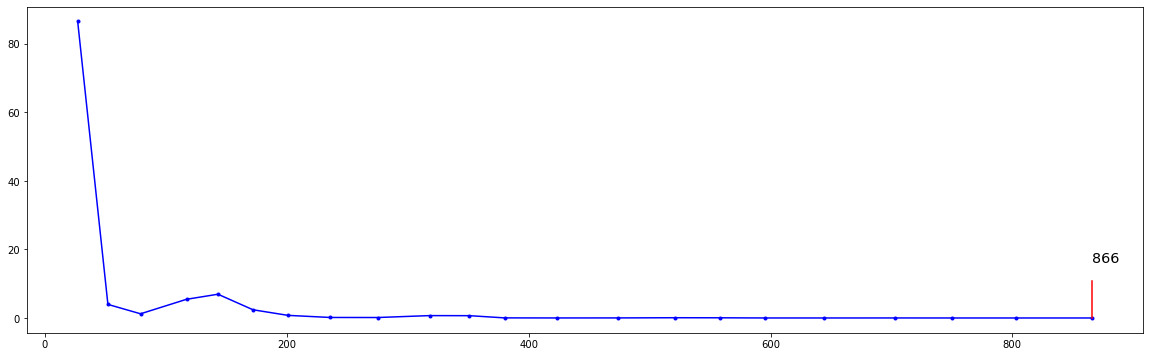

In [130]:
printm('$R = 0.1$')
test_FR({
    'func': Function(f, R=0.1, constraints=[lambda x1, x2: - (x1 - 2)**2 - x2**2 + 4]),
    #'func': Function(f),
    'x0': np.array([[2], [0]], dtype=np.float32),
    'h_diff': 0.0001,
    'epsilon': 0.00001,
    'h_epsilon': 1e-6,
    'eps_onedim': 0.001,
    'diff_method': 'central',
    'alpha': 0.1,
    'h_search': 'gold',
    'stop_crit': 'single',
    'do_restarts': [True],
})

$R = 0.01$

do_restarts=True:    $x_{opt} = [0.99518442, 0.99034273]$ $i$=19

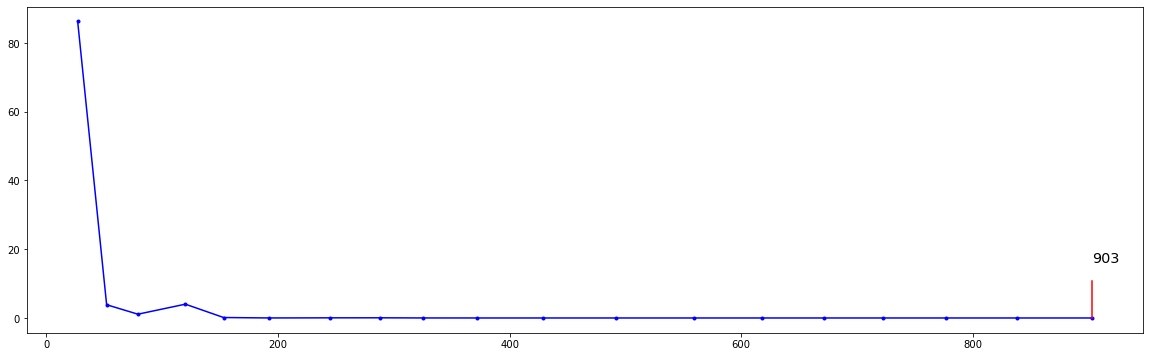

In [131]:
printm('$R = 0.01$')
test_FR({
    'func': Function(f, R=0.01, constraints=[lambda x1, x2: - (x1 - 2)**2 - x2**2 + 4]),
    'x0': np.array([[2], [0]], dtype=np.float32),
    'h_diff': 0.0001,
    'epsilon': 0.00001,
    'h_epsilon': 1e-6,
    'eps_onedim': 0.001,
    'diff_method': 'central',
    'alpha': 0.1,
    'h_search': 'gold',
    'stop_crit': 'single',
    'do_restarts': [True],
})

Як бачимо, з параметром R=0.01 вдалося досягти достатньої точності.

2.2 Випукла область з мінімумо зовні: Візьмемо дану область:
$$(x_1 + 2)^2 + x_2^2 \leq 4$$
Тоді потрібне нам обмеження буде мати наступний вигляд:
$$ - (x_1 + 2)^2 - x2^2 + 4 \geq 0 $$
<img src="area2.png">
Тоді штрафна функція буде виглядати так:
$$ P(x, R) = (1 - x_1)^2 + 100 (x_2 - x_1^2)^2 - R \ln{\Big[- (x_1 + 2)^2 - x_2^2 + 4\Big]} $$

do_restarts=True:    $x_{opt} = [1.0083161, , 1.01671808]$ $i$=80

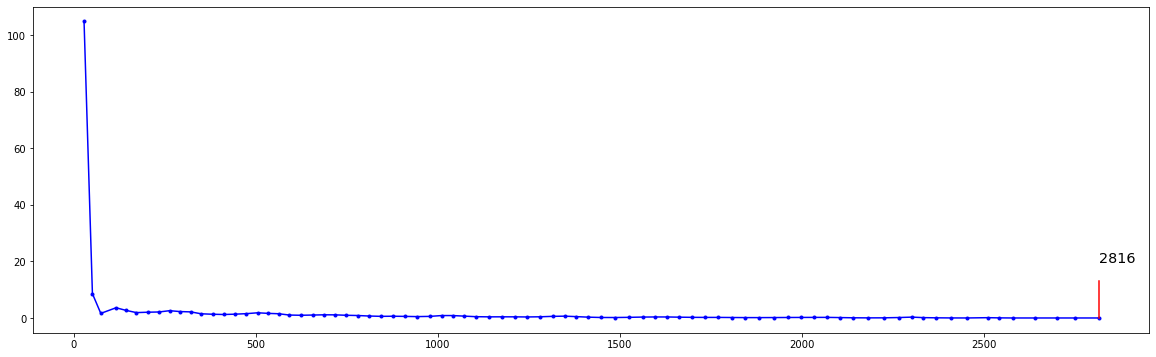

In [132]:
test_FR({
    'func': Function(f, R=0.01, constraints=[lambda x1, x2: - (x1 + 2)**2 - x2**2 + 4]),
    'x0': np.array([[-2], [0]], dtype=np.float32),
    'h_diff': 0.0001,
    'epsilon': 0.00001,
    'h_epsilon': 1e-6,
    'eps_onedim': 0.001,
    'diff_method': 'central',
    'alpha': 0.1,
    'h_search': 'gold',
    'stop_crit': 'single',
    'do_restarts': [True],
})

У порівнянні з випадком, коли мінімум точки знаходиться всередині області, метод Флетчера-Рівса збігається набагато довше.

2.3 Невипукла область з мінімумом усередині. Візьмемо дану невипуклу область:
$$\begin{cases} (x_1 - 2)^2 + x_2^2 \leq 4 \\ (x_1 - 2)^2 + x_2^2 \geq 1 \end{cases} $$
Тоді потрібні нам обмеження будуть мати наступний вигляд:
$$\begin{cases} - (x_1 - 2)^2 - x_2^2 + 4 \geq 0 \\ (x_1 - 2)^2 + x_2^2 - 1\geq 0 \end{cases} $$
<img src="area3.png">
Тоді штрафна функція буде виглядати так:
$$ P(x, R) = (1 - x_1)^2 + 100 (x_2 - x_1^2)^2 - R \ln{\Big[- (x_1 - 2)^2 - x_2^2 + 4\Big]} - R \ln{\Big[(x_1 - 2)^2 + x_2^2 - 1\Big]} $$

do_restarts=True:    $x_{opt} = [1.00503671, 1.01014797]$ $i$=88

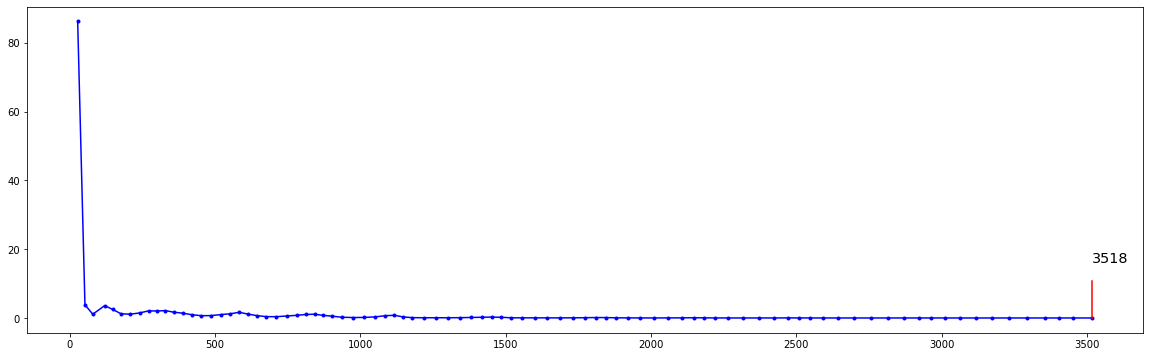

In [133]:
test_FR({
    'func': Function(f, R=0.01, constraints=[lambda x1, x2: - (x1 - 2)**2 - x2**2 + 4,
                                             lambda x1, x2: (x1 - 2)**2 + x2**2 - 1]),
    'x0': np.array([[2], [0]], dtype=np.float32),
    'h_diff': 0.0001,
    'epsilon': 0.001,
    'h_epsilon': 1e-6,
    'eps_onedim': 0.001,
    'diff_method': 'central',
    'alpha': 0.1,
    'h_search': 'gold',
    'stop_crit': 'single',
    'do_restarts': [True],
})

2.4 Невипукла область з мінімумом зовні. Візьмемо дану невипуклу область:
$$\begin{cases} (x_1 + 2)^2 + x_2^2 \leq 4 \\ (x_1 + 2)^2 + x_2^2 \geq 1 \end{cases} $$
Тоді потрібні нам обмеження будуть мати наступний вигляд:
$$\begin{cases} - (x_1 + 2)^2 - x_2^2 + 4 \geq 0 \\ (x_1 + 2)^2 + x_2^2 - 1\geq 0 \end{cases} $$
<img src="area4.png">
Тоді штрафна функція буде виглядати так:
$$ P(x, R) = (1 - x_1)^2 + 100 (x_2 - x_1^2)^2 - R \ln{\Big[- (x_1 + 2)^2 - x_2^2 + 4\Big]} - R \ln{\Big[(x_1 + 2)^2 + x_2^2 - 1\Big]} $$

do_restarts=True:    $x_{opt} = [1.01388349, 1.02798776]$ $i$=71

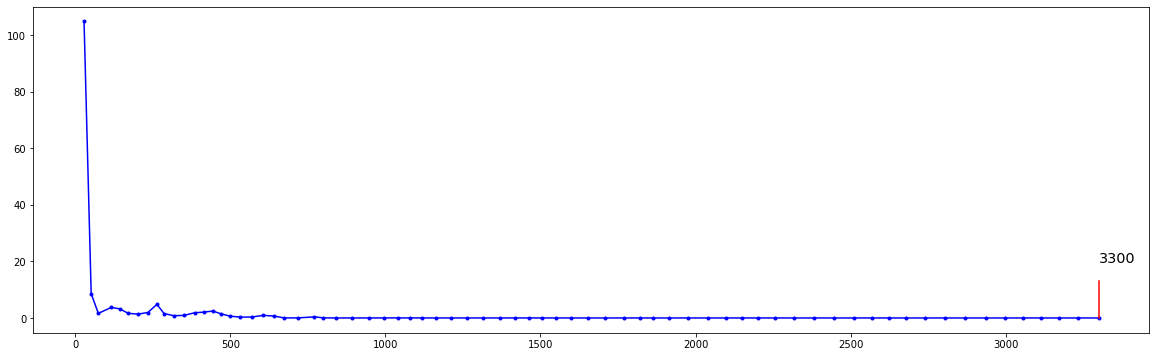

In [134]:
test_FR({
    'func': Function(f, R=0.01, constraints=[lambda x1, x2: - (x1 + 2)**2 - x2**2 + 4,
                                             lambda x1, x2: (x1 + 2)**2 + x2**2 - 1]),
    'x0': np.array([[-2], [0]], dtype=np.float32),
    'h_diff': 0.0001,
    'epsilon': 0.00001,
    'h_epsilon': 1e-6,
    'eps_onedim': 0.001,
    'diff_method': 'central',
    'alpha': 0.1,
    'h_search': 'gold',
    'stop_crit': 'single',
    'do_restarts': [True],
})

У випадку невипуклої області, точність методу про розташуванні мінімуму усередині області трохи більше, аніж за мінімум зовні області, але швидкість збіжності трохи нижче.

## Висновки
У даній курсовій роботі було досліджено збіжність методу Флетчера-Рівса при мінімізації функції Розенброка.<br><br>

Спочатку ми дослідили залежність збіжності від значення кроку диференціювання $h$. Виявилося, що $h$ значно впливає на збіжність даного методу. Найоптимальніше значення – $h=10^{-4}$, при якому к-сть ітерацій = 21, а к-сть обчислень функції = 618.<br><br>

При дослідженні залежності збіжності від схеми похідної, було виявлено, що центральна схема є найоптимальнішою (20 ітерацій, 575 обчислень). Ліва та центральна схема досягають приблизно однакової точності та швидкості.<br><br>

При дослідженні залежності збіжності від виду методу одновимірного пошуку та точності методу одновимірного пошуку було виявлено наступне:
1. Для досягнення **одного** результату методам потрібна **різна** точність. Найкращою точністю для методу золотого перетину виявилося значення $0.001$, а для ДСК-Пауелла – $0.01$, при чому швидкість збігу та точність для методу Флетчера-Рівса у них схожа.
2. Для золотого перетину метод Флетчера-Рівса збігається більш плавно, аніж для ДСК-Пауелла.
3. Методу ДСК-Пауелла потрібна велика кількість обчислення функції на першій ітерації.
<br><br>
При дослідженні залежності збіжності від значення параметру в алгоритмі Свена, було виявлено, що при зменшенні параметру також зменшується точність методу Флетчера-Рівса. Найптимальніше значення – $\alpha=0.1$.<br><br>

При дослідженні впливу критерію закінчення на збіжність, було виявлено, що для критерію у вигляді системи потрібно виставляти значно менше значення $\varepsilon$ порівняно з "одиночним" критерієм, щоб досягти задовільної точності. Загалом, про одному $\varepsilon$ критерій системи показує більш високу швидкість, але гіршу точність.<br><br>

Наявність рестартів значно не вплинула на роботу методу.<br><br>

У порівнянні зі стандартною реалізацією методу Флетчера-Рівса, модифікація Полака-Ріб’єра показує дещо кращу точність, але меншу швидкість збіжності.<br><br>

Також було використано метод штрафних функцій (метод внутрішньої точки) для умовної оптимізації в залежності від випуклості області та розташування мінімуму відносно цієї області.

## Посилання
https://neos-guide.org/content/nonlinear-conjugate-gradient-method<br>
https://en.wikipedia.org/wiki/Conjugate_gradient_method<br>
https://github.com/alexis-mignon/python-lgbopt/blob/master/lgbopt.py